## Задание 1
**Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения). Сделать выводы об адекватности этих статистик.**

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
df = pd.read_csv("/gdrive/My Drive/train.csv")

In [4]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Максимальные значения многих признаков ненормально большие.
Не все признаки имеют все наблюдения.

## Задание 2
**Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются. Сделать выводы по каждому признаку.**

In [5]:
for column in df.columns:
  print(df[column].value_counts(), "\n\n")

2047     1
9502     1
11559    1
9510     1
13604    1
        ..
12907    1
10856    1
4711     1
6758     1
0        1
Name: Id, Length: 10000, dtype: int64 


27     851
1      652
23     565
6      511
9      294
      ... 
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64 


2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64 


26.553188     1
46.363496     1
100.751999    1
70.726600     1
40.523022     1
             ..
76.481158     1
86.915187     1
82.482521     1
43.112986     1
97.664912     1
Name: Square, Length: 10000, dtype: int64 


28.003539    1
19.224066    1
21.613298    1
25.688943    1
44.662105    1
            ..
37.980219    1
17.130385    1
33.273700    1
28.313300    1
28.421652    1
Name: LifeSquare, Length: 7887, dtype: int64 


1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843


##Задание 3
**Используя выводы из двух предыдущих заданий, найдите те наблюдения, где есть пропуски, выбросы (неадекватные значения признака, которые отличаются от большинства), используя фильтрацию из pandas.**


In [6]:
print(df.query("( (Rooms == Rooms.max()) | (Rooms == Rooms.min()) )").loc[:, "Rooms"])
print(df.query("( Rooms > Rooms.quantile(0.999) )").loc[:, "Rooms"])                          # подозрительное число комнат
print("="*80, "\n")
print(df.query("( (Square == Square.max()) | (Square == Square.min()) )").loc[:, "Square"])
print("="*80, "\n")
print(df.query("( (LifeSquare > Square) | (LifeSquare != LifeSquare) | (LifeSquare == LifeSquare.max()) | (LifeSquare == LifeSquare.min()) )").loc[:, "LifeSquare"])
print("="*80, "\n")
print(df.query("( (KitchenSquare == 0) | (KitchenSquare > LifeSquare) | (KitchenSquare > Square) | (KitchenSquare == KitchenSquare.max()))").loc[:, "KitchenSquare"])
print("="*80, "\n")
print(df.query("( (Floor > HouseFloor) | (HouseFloor == 0) )").loc[:, ["Floor", "HouseFloor"]])
print("="*80, "\n")
print(df.query("( HouseYear > datetime.now().year )").loc[:, "HouseYear"])
print("="*80, "\n")
print(df.query("( Healthcare_1 != Healthcare_1 )").loc[:, "Healthcare_1"])
print("="*80, "\n")

2194     0.0
3780     0.0
5894     0.0
6088    19.0
6401     0.0
7644     0.0
7929     0.0
9767     0.0
9869     0.0
Name: Rooms, dtype: float64
2004    10.0
2728    10.0
6088    19.0
8794     6.0
Name: Rooms, dtype: float64

7470      1.136859
9229    641.065193
Name: Square, dtype: float64

0             NaN
3             NaN
18            NaN
20            NaN
24            NaN
          ...    
9981          NaN
9983          NaN
9987    64.602939
9991          NaN
9993    88.931509
Name: LifeSquare, Length: 2596, dtype: float64

24      0.0
38      0.0
64      0.0
88      0.0
94      0.0
       ... 
9945    0.0
9950    0.0
9965    0.0
9991    0.0
9993    0.0
Name: KitchenSquare, Length: 720, dtype: float64

      Floor  HouseFloor
17        6         5.0
19       16        14.0
21       11         9.0
24        2         0.0
25       18         1.0
...     ...         ...
9960     15         1.0
9968     18        17.0
9970     18        17.0
9975     18        17.0
9996     13   

# Задание 6
Построить график распределения целевой переменной. Сделать выводы.

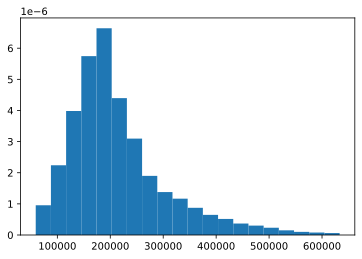

In [7]:
plt.hist(df['Price'], bins=20, density=True)
plt.show()

# Задание 7
Построить гистограммы для наиболее проблемных признаков (используйте выводы из первого ДЗ). Сделайте по ним выводы.

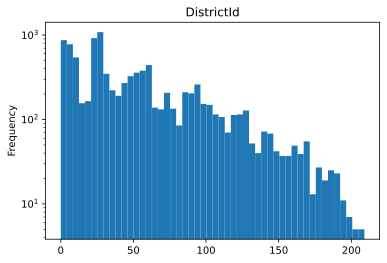

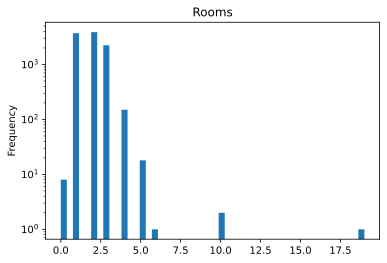

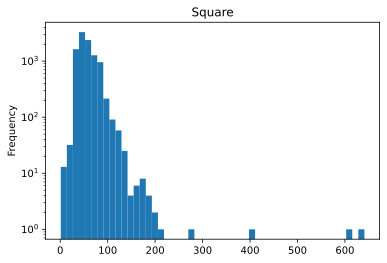

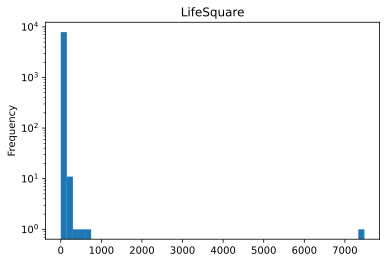

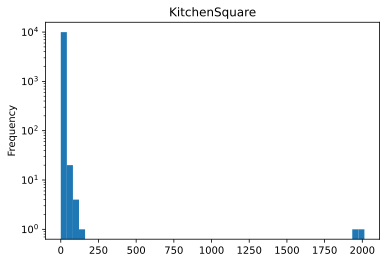

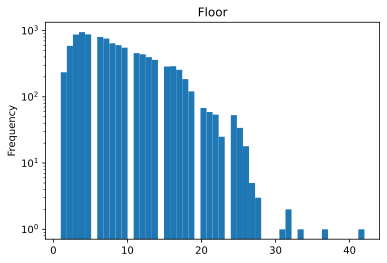

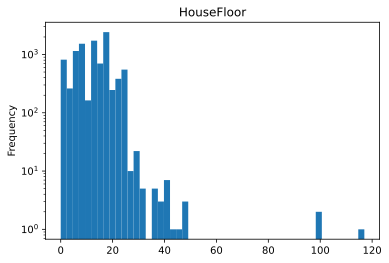

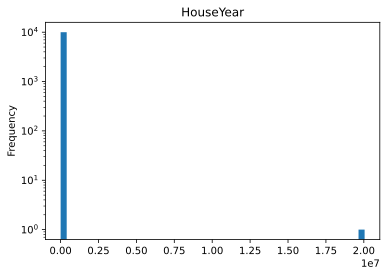

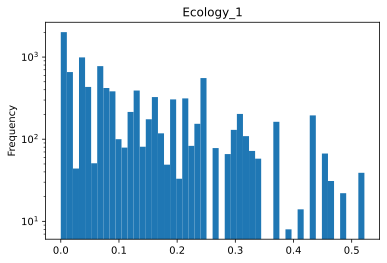

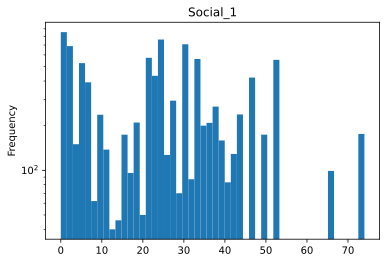

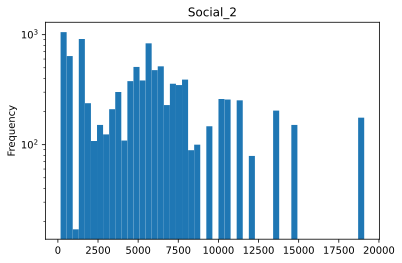

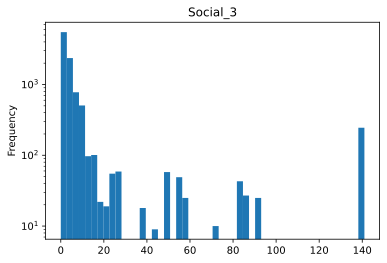

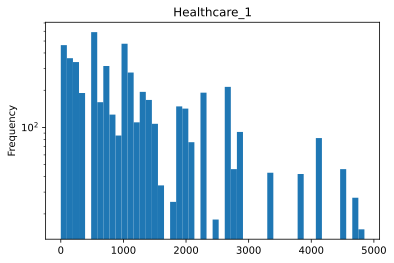

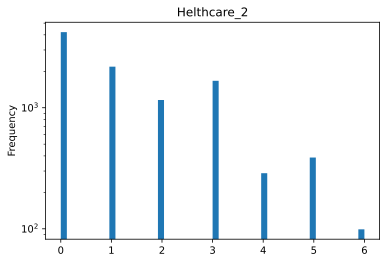

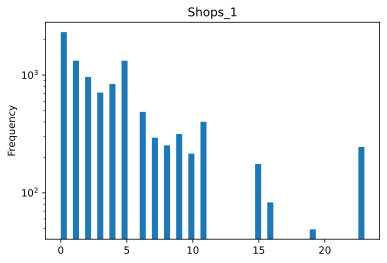

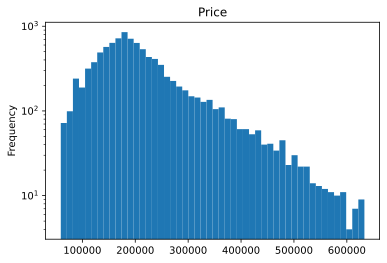

In [11]:
for column in df.select_dtypes(include=['float64', 'int64']).columns[1:]:
  df[column].plot(title=column, kind="hist", logy=True, bins=50)
  plt.show()

## Вывод - ... 
Данные - ужас. Сплошные выбросы и пропуски. Чистить - не перечистить.

## Задание 8
Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

Id               0.009880
DistrictId       0.265100
Rooms            0.550291
Square           0.520075
LifeSquare       0.081292
KitchenSquare    0.028864
Floor            0.128715
HouseFloor       0.088280
HouseYear        0.004305
Ecology_1       -0.058381
Social_1         0.263286
Social_2         0.239226
Social_3         0.074878
Healthcare_1     0.138755
Helthcare_2      0.253090
Shops_1          0.180876
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


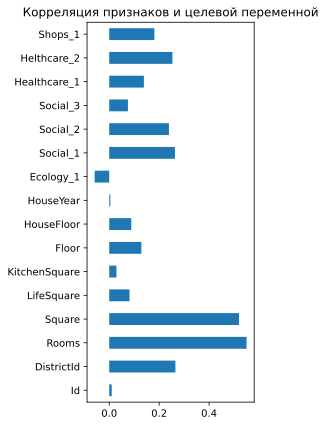

In [9]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.drop(["Price"], axis=1, inplace=True)
corrs = df_num_features.corrwith(df["Price"], axis=0, method="pearson")
print(corrs)
corrs.plot(kind="barh", figsize=(3,7), title="Корреляция признаков и целевой переменной")
plt.show()

In [10]:
corr_df = df.corr()
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.00,0.01,-0.01,-0.01,0.02,0.02,0.00,-0.01,0.01,0.02,-0.00,-0.00,-0.01,-0.00,0.00,-0.01,0.01
DistrictId,0.01,1.00,0.07,-0.03,-0.02,0.04,-0.12,-0.15,0.01,0.07,0.25,0.17,0.14,0.30,0.31,0.17,0.27
Rooms,-0.01,0.07,1.00,0.66,0.13,0.01,-0.00,-0.03,-0.01,-0.03,0.08,0.07,0.01,0.04,0.06,0.05,0.55
Square,-0.01,-0.03,0.66,1.00,0.20,0.01,0.11,0.08,-0.01,-0.06,-0.07,-0.04,0.04,-0.04,-0.02,0.02,0.52
LifeSquare,0.02,-0.02,0.13,0.20,1.00,-0.00,0.02,0.03,-0.00,-0.02,-0.05,-0.04,0.01,-0.03,-0.02,-0.01,0.08
KitchenSquare,0.02,0.04,0.01,0.01,-0.00,1.00,-0.01,0.00,0.00,-0.01,0.04,0.04,-0.02,0.01,0.04,0.01,0.03
Floor,0.00,-0.12,-0.00,0.11,0.02,-0.01,1.00,0.42,0.00,-0.02,-0.04,-0.02,-0.00,-0.14,-0.07,0.02,0.13
HouseFloor,-0.01,-0.15,-0.03,0.08,0.03,0.00,0.42,1.00,-0.00,-0.00,-0.02,0.01,-0.01,-0.14,-0.07,0.03,0.09
HouseYear,0.01,0.01,-0.01,-0.01,-0.00,0.00,0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.01,0.01,0.00,0.00
Ecology_1,0.02,0.07,-0.03,-0.06,-0.02,-0.01,-0.02,-0.00,0.00,1.00,0.03,0.01,-0.12,-0.04,0.03,-0.08,-0.06


## Выводы
На мой взгляд, признаки Id, LifeSquare, KitchenSquare, HouseFloor, HouseYear, Ecology, Social_3 имеют слабое либо никакого влияния на целевую переменную и попадают в кандидаты на удаление